<a href="https://colab.research.google.com/github/Jozefina-Gramatikova/Find_the_handwritten_numbers/blob/main/Handwritten_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import numpy as np

In [332]:
import pandas as pd

In [333]:
import seaborn as sns

In [334]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [335]:
#importing google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [336]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Jozefina Gramatikova - MNIST_train.csv' )

In [337]:
df_train

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
df_train.columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [339]:
df_train.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

In [340]:
df_train

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [341]:
X_train = df_train.to_numpy()

In [342]:
X_train.shape

(60000, 785)

In [343]:
y_train=X_train[:,0]

In [344]:
y_train.shape

(60000,)

In [345]:
X_train=X_train[:,1  :  ]

In [346]:
X_train.shape

(60000, 784)

In [347]:
y_train.shape

(60000,)

In [348]:
X_train.shape

(60000, 784)

In [349]:
df_test = pd.read_csv('/content/gdrive/MyDrive/Jozefina Gramatikova - MNIST_test.csv' )

In [350]:
df_test


,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [351]:
df_test.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

In [352]:
df_test

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [353]:
X_test = df_test.to_numpy()

In [354]:
np.min(X_test)

0

In [355]:
np.min(y_test)

0

In [356]:
y_test=X_test[:,0]

In [357]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [358]:
np.any(y_test<0)

False

In [359]:
np.any(X_test<0)

False

In [360]:
X_test=X_test[:, 1  :  ]

In [361]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [362]:
y_test.shape

(10000,)

In [363]:
X_test.shape

(10000, 784)

In [364]:
class GaussNB(): #Gaussian Naive Baise

  def fit(self, X, y, epsilon=1e-3): #the fit method X, y - test labels; self creates a global variable withing the class its like a memory
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:] #we only want the class where y=k

      #we are going to populate our likelihoods
      self.likelihoods[k]={"mean": X_k.mean(axis=0), 'cov': X_k.var(axis=0)+ epsilon} #var=variance=sigma
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):

    N, D = X.shape
    P_hat = np.zeros((N, len(self.K))) #predicted probability
    
    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l['mean'], l['cov'])+np.log(self.priors[k]) #probability density function

    return P_hat.argmax(axis=1)


In [365]:
gnb = GaussNB()

In [366]:
gnb.fit(X_train,y_train)

In [367]:
y_hat_test=gnb.predict(X_test)

In [368]:
y_hat_train=gnb.predict(X_train)

In [369]:
accuracy(y_test, y_hat_test)

0.5878

In [370]:
import matplotlib.pyplot as plt

In [371]:
X_test.shape

(10000, 784)

In [372]:
import matplotlib.pyplot as plt

In [373]:
y_train[:5]

array([5, 0, 4, 1, 9])

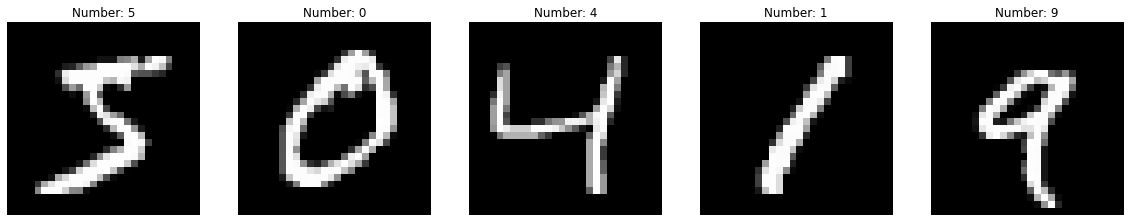

In [374]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[:5], y_train[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Number: %s" % label)
    plt.axis('off')

In [375]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [376]:
accuracy(y_train, y_hat_train)

0.5938

Text(0.5, 42.0, 'Predicted label')

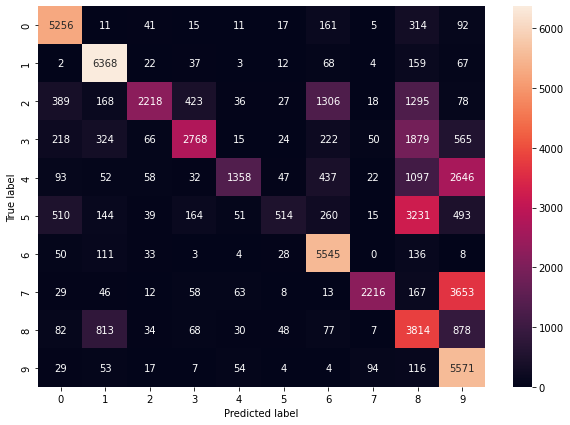

In [377]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(y_hat_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')




Non Naive Bayse

In [378]:
class GaussBayes():

  def fit(self, X, y, epsilon= 1e-3): # epsilon - a small quantity that we can use to prevent division by zero

    self.likelihoods =dict()
    self.priors =dict()
    self.K= set(y.astype(int)) # the set of "y"s as type integer

    #we are going to set our covariance matrix in a different way
    for k in self.K: #for each class k 

      X_k = X[y==k, :]  # all the columns
      N_k, D = X_k.shape #N_k how many observations I have for this particular class, D-total number of columns (features)
      mu_k = X_k.mean(axis=0) #mean of all observations

 
      self.likelihoods[k] ={"mean": X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k)+epsilon*np.identity(D)} 
      #self likelihoods of this particular class k, matmul - matrix multiplication
      #T-transpose; using the identity matrix because we need to add a value
      

      self.priors[k] = len(X_k)/len(X) # the propbability that we land on one of our classes

  
  def predict(self, X):  #let's predict

    N, D = X.shape 
    P_hat = np.zeros((N, len(self.K)))  # P_hat is first initialised as an empty array 

    for k, l in self.likelihoods.items():  
      P_hat[:,k]=mvn.logpdf(X,l["mean"], l["cov"])+np.log(self.priors[k]) 

      return P_hat.argmax(axis=1) #P_hat is the likelihood array - contains the likelihoods, and the maximum argument of those likelihoods will be our predicted class


In [387]:
gnb2 = GaussBayes()

In [388]:
gnb2.fit(X_train,y_train)

In [389]:
X_test.shape

(10000, 784)

In [390]:
non_naive_y_hat_test=gnb2.predict(X_test)

In [391]:
non_naive_y_hat_train=gnb2.predict(X_train)

In [392]:
accuracy(y_test, non_naive_y_hat_test)

0.1135

In [393]:
accuracy(y_train, non_naive_y_hat_train)

0.11236666666666667

Text(0.5, 42.0, 'Predicted label')

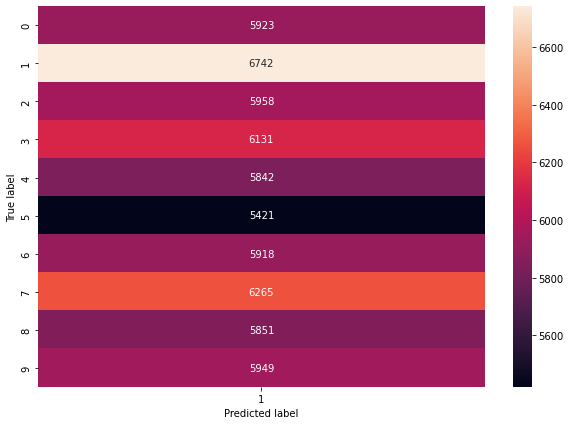

In [394]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(non_naive_y_hat_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')